# Deceting Synchronicity with Unitary Event Analysis (UEA)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import quantities as pq
from neo.core import Block, Segment, SpikeTrain, AnalogSignal
import elephant.unitary_event_analysis as ue
import elephant.conversion as conv
from elephant.spike_train_generation import StationaryPoissonProcess, NonStationaryPoissonProcess
from viziphant.unitary_event_analysis import plot_ue
np.random.seed(15) # Fix random seed to guarantee fixed output
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## 1 Preparation

Download the data required for this session

In [3]:
import os
import requests
import zipfile

url = "https://uni-bonn.sciebo.de/s/FV84Gvj3ZKHPN4Z"
fname = "allen"

if not os.path.exists("../data"):
    os.mkdir("../data")

if not os.path.exists(f"../data/{fname}"):
    response = requests.get(f"{url}/download")
    with open(f"{fname}.zip", "wb") as file:
        file.write(response.content)

    with zipfile.ZipFile(f"{fname}.zip", "r") as zip_ref:
        zip_ref.extractall(f"../data/{fname}")
        os.remove(f"{fname}.zip")

Define the utility functions for this notebook

In [4]:
from neo.core import AnalogSignal
import pandas as pd
from elephant.spike_train_surrogates import trial_shifting


class utils:
    @staticmethod
    def spike_trains_with_unitary_events(base_rate, sync_rate, n_neurons, n_trials):

        base = StationaryPoissonProcess(rate=base_rate, t_stop=2 * pq.s)

        rate_signal = np.zeros(2000) * pq.Hz
        rate_signal[1000:1200] = sync_rate
        rate_signal = AnalogSignal(rate_signal, sampling_rate=1000 * pq.Hz)

        sync = NonStationaryPoissonProcess(rate_signal)
        sync_spikes = sync.generate_n_spiketrains(n_trials)

        trials = []
        for t in range(n_trials):
            trial = []
            for n in range(n_neurons):
                trial.append(base.generate_spiketrain().merge(sync_spikes[t]))
            trials.append(trial)
        return trials, sync_spikes

    def load_spike_trains(unit_ids):
        session = "ses-778240327"
        spikes = pd.read_parquet(f"../data/allen/{session}/flash_spikes.parquet")
        stimuli = pd.read_parquet(f"../data/allen/{session}/flash_stimuli.parquet")

        unit_ids = spikes["unit_id"].unique()[unit_ids]
        print(len(spikes["unit_id"].unique()))
        spikes = spikes[spikes["unit_id"].isin(unit_ids)]

        trials = []
        for stim in stimuli["start_time"]:
            mask = (spikes["spike_time"] >= stim) & (spikes["spike_time"] < stim + 1)
            trial_spikes = spikes[mask]
            units = []
            for unit_id in trial_spikes["unit_id"].unique():
                unit_spikes = trial_spikes[trial_spikes["unit_id"] == unit_id]
                brain_area = unit_spikes["brain_area"].iloc[0]
                spike_times = unit_spikes["spike_time"].to_numpy()
                st = SpikeTrain(
                    spike_times * pq.s, t_start=stim, t_stop=stim + 1, name=brain_area
                )
                st = st.time_shift(-st.t_start)
                units.append(st)
            if len(units) == len(unit_ids):
                trials.append(units)
        return trials

## 2 Simulating Neurons with Coincident Firing

| Code | Description |
|------------------------------------|------------------------------------|
| `trials, sync_spikes = utils.spike_trains_with_unitary_events()` | Simulate spike trains that contain synchronous events and return a list of `trials` where each element is a list of spike trains (one per neuron) as well as a list `sync_spikes` that contains the synchronous spikes for every trial |
| `[trial[0].times for trial in trials]` | Get a list of spike `.times` for neuron `[0]` for each `trial` in the list of `trials` |
| `[st.times for st in sync_spikes]` | Get a list of spike `.times` for each spike train `st` in the list of `sync_spikes` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 1**</span> Simulate **2 neurons**
for **100 trials** with a base firing rate of **10 Hz** and a
synchronous firing rate of **1 Hz**. Then, plot the simulated spike
trains and highlight the synchronous spikes in red.

``` python
trials, sync_spikes = utils.spike_trains_with_unitary_events(
    n_neurons=2, n_trials=100, base_rate=10 * pq.Hz, sync_rate=1 * pq.Hz
)

ax1 = plt.subplot(2, 1, 1)
plt.eventplot([trial[0].times for trial in trials])
plt.eventplot(
    [st.times for st in sync_spikes], color="red", linewidths=3, linelengths=3
)
plt.ylabel("Trial #")

ax2 = plt.subplot(2, 1, 2, sharex=ax1, sharey=ax1)
plt.eventplot([trial[1].times for trial in trials])
plt.eventplot(
    [st.times for st in sync_spikes], color="red", linewidths=3, linelengths=3
)
plt.xlabel("Time [s]")
plt.ylabel("Trial #")
```

    Text(0, 0.5, 'Trial #')

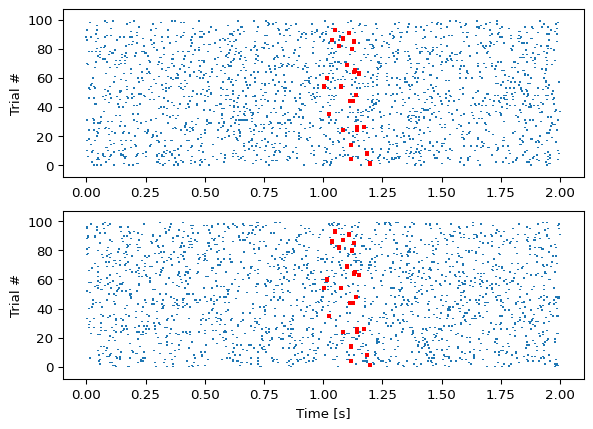

<span class="theorem-title">**Exercise 1**</span> Simulate **2 neurons**
for **100 trials** with a base firing rate of **5 Hz** and a synchronous
firing rate of **0.5 Hz**. Then, plot the simulated spike trains and
highlight the synchronous spikes in red.

``` python
trials, sync_spikes = utils.spike_trains_with_unitary_events(
    base_rate=5 * pq.Hz, sync_rate=0.5 * pq.Hz, n_neurons=2, n_trials=100
)

ax1 = plt.subplot(2, 1, 1)
plt.eventplot([trial[0].times for trial in trials])
plt.eventplot([st.times for st in sync_spikes], color="red", linewidths=3, linelengths=3)
plt.ylabel("Trial #")

ax2 = plt.subplot(2, 1, 2, sharex=ax1, sharey=ax1)
plt.eventplot([trial[1].times for trial in trials])
plt.eventplot([st.times for st in sync_spikes], color="red", linewidths=3, linelengths=3)
plt.xlabel("Time [s]")
plt.ylabel("Trial #")
```

    Text(0, 0.5, 'Trial #')

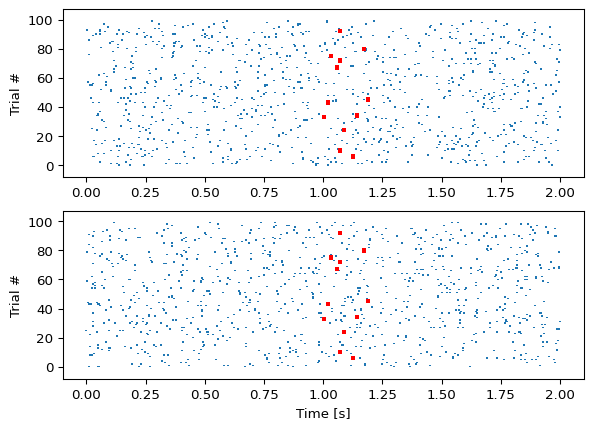

<span class="theorem-title">**Exercise 2**</span> Simulate **3 neurons**
for **50 trials** with a base firing rate of **5 Hz** and a synchronous
firing rate of **0.5 Hz**. Then, plot the simulated spike trains and
highlight the synchronous spikes in red.

``` python
trials, sync_spikes = utils.spike_trains_with_unitary_events(
    base_rate=5 * pq.Hz, sync_rate=0.5 * pq.Hz, n_neurons=3, n_trials=50
)
ax1 = plt.subplot(3, 1, 1)
plt.eventplot([trial[0].times for trial in trials])
plt.eventplot(
    [st.times for st in sync_spikes], color="red", linewidths=3, linelengths=3
)
plt.ylabel("Trial #")

ax2 = plt.subplot(3, 1, 2)
plt.eventplot([trial[1].times for trial in trials])
plt.eventplot(
    [st.times for st in sync_spikes], color="red", linewidths=3, linelengths=3
)
plt.ylabel("Trial #")

ax3 = plt.subplot(3, 1, 3, sharex=ax1, sharey=ax1)
plt.eventplot([trial[2].times for trial in trials])
plt.eventplot(
    [st.times for st in sync_spikes], color="red", linewidths=3, linelengths=3
)
plt.xlabel("Time [s]")
plt.ylabel("Trial #")
```

    Text(0, 0.5, 'Trial #')

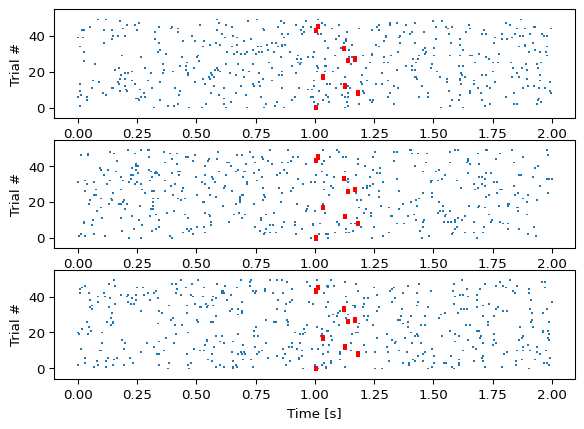

## 3 Applying Unitary Event Analysis to Simulated Data

| Code | Description |
|------------------------------------|------------------------------------|
| `UE = ue.jointJ_window_analysis(trials)` | Perform unitary event analysis on the list of `trials` |
| `UE = ue.jointJ_window_analysis(trials, bin_size=1*pq.ms)` | Perform unitary event analysis on the list of `trials` using a `bin_size` of 1 ms |
| `plot_ue(trials, UE, significance_level=0.05)` | Plot the `trials` and the unitary event analysis result `UE` and highlight spikes that exceed the given significance threshold |

------------------------------------------------------------------------

<span class="theorem-title">**Example 2**</span> Simulate **2 neurons**
for **100 trials** with a base firing rate of **10 Hz** and a
synchronous firing rate of **1 Hz**. Then, apply unitary event analysis
and plot the results.

``` python
trials, _ = utils.spike_trains_with_unitary_events(
    base_rate=10 * pq.Hz, sync_rate=1 * pq.Hz, n_neurons=2, n_trials=100
)
UE = ue.jointJ_window_analysis(trials)
plot_ue(trials, UE, significance_level=0.05)
```

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

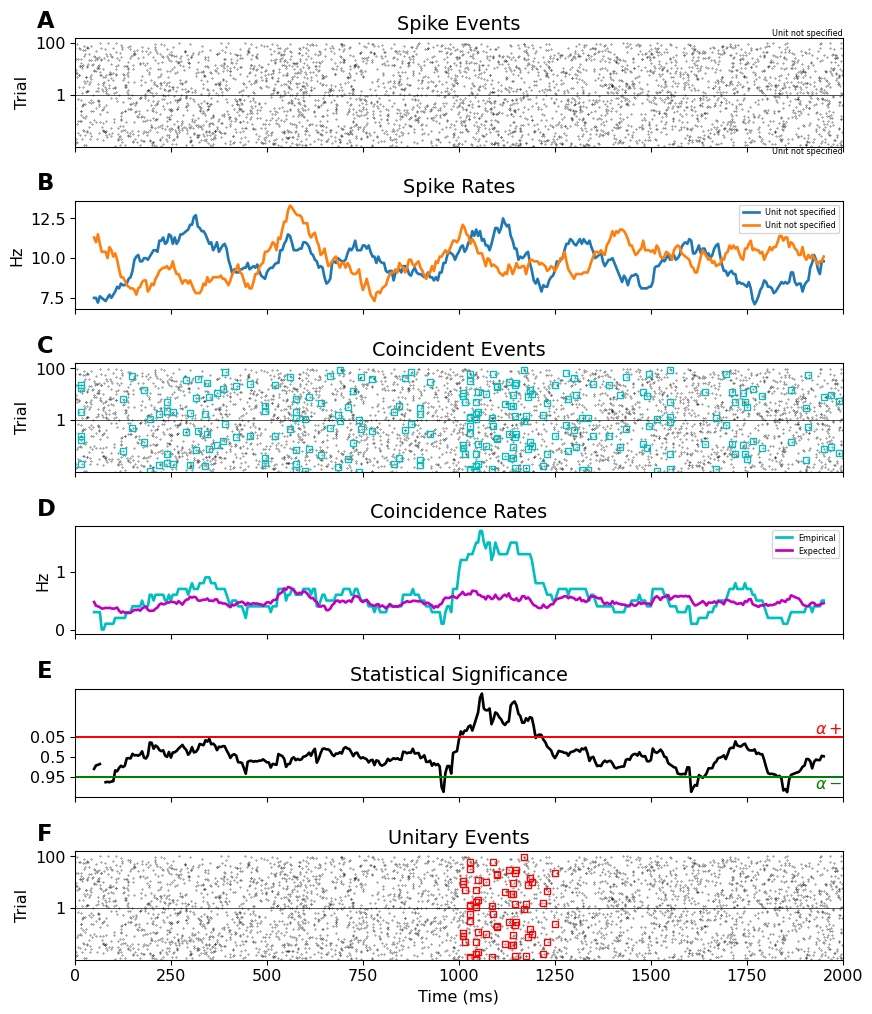

<span class="theorem-title">**Exercise 3**</span> Plot the unitary event
analysis results again but increase the `significance_level` to
**0.01**.

``` python
plot_ue(trials, UE, significance_level=0.01)
```

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

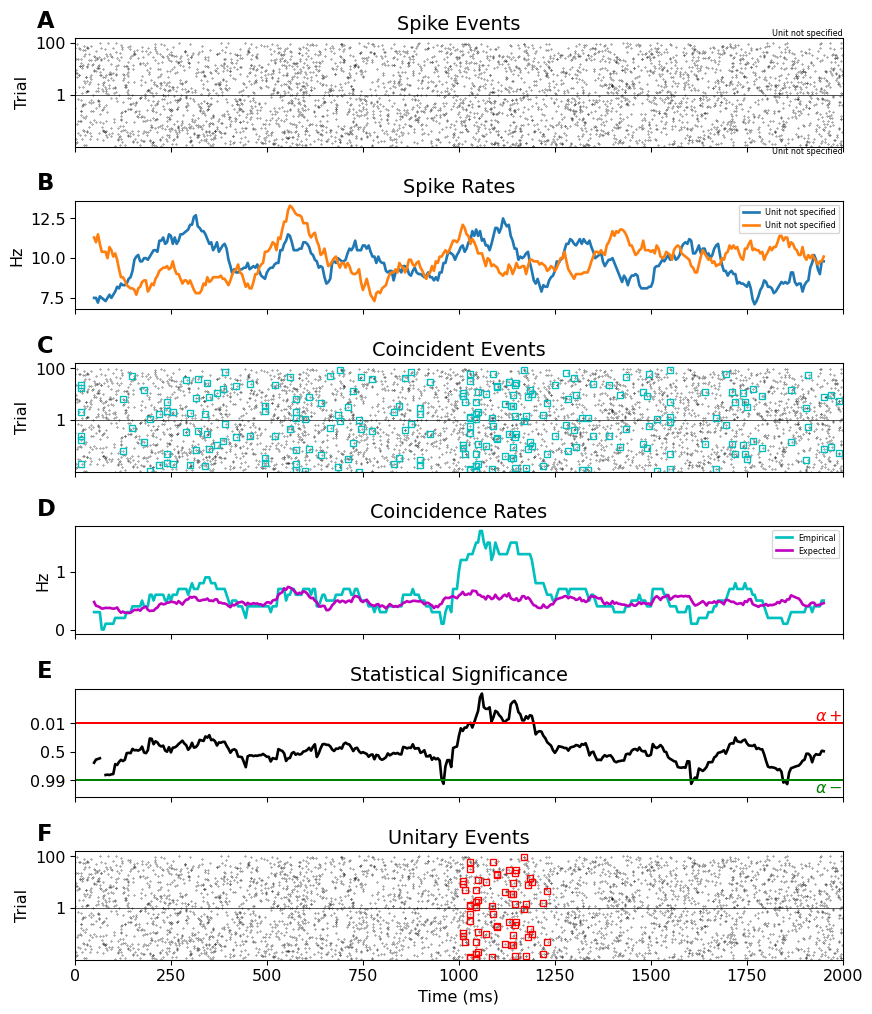

<span class="theorem-title">**Exercise 4**</span> Re-run the unitary
event analysis but set the `bin_size` to **1 ms**. How does this affect
the number of coincident events (i.e. the blue boxes in panel C) and the
number of unitary events (i.e. the red boxes in panel E)?

``` python
UE = ue.jointJ_window_analysis(trials, bin_size=1 * pq.ms)
plot_ue(trials, UE, significance_level=0.05)
```

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

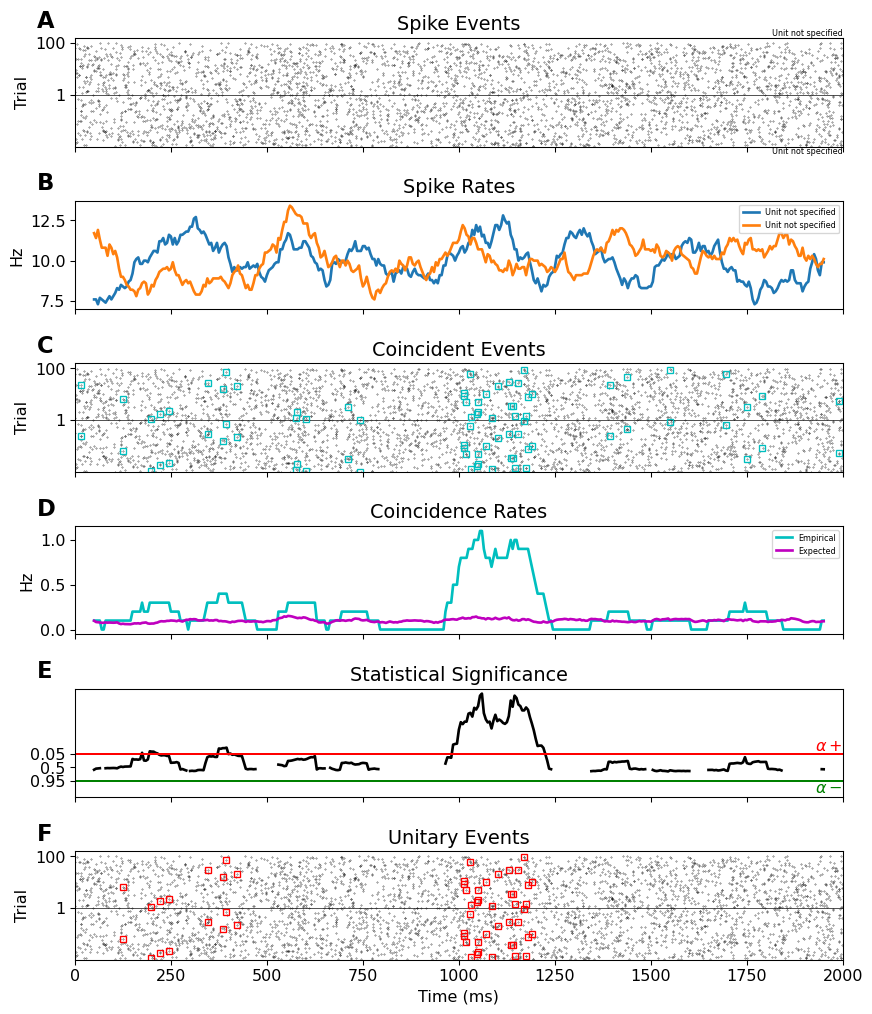

The number of coincident events should be greatly reduced, the number of
unitary events should stay roughly equal.

<span class="theorem-title">**Exercise 5**</span> Simulate **3 neurons**
for **50 trials** with a base firing rate of **10 Hz** and a synchronous
firing rate of **1 Hz**. Then, apply unitary event analysis and plot the
results. How does the number of coincident and unitary events compare to
the simulations involving only two neurons?

``` python
trials, _ = utils.spike_trains_with_unitary_events(
    base_rate=10 * pq.Hz, sync_rate=1 * pq.Hz, n_neurons=3, n_trials=50
)
UE = ue.jointJ_window_analysis(trials)
plot_ue(trials, UE, significance_level=0.05)
```

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

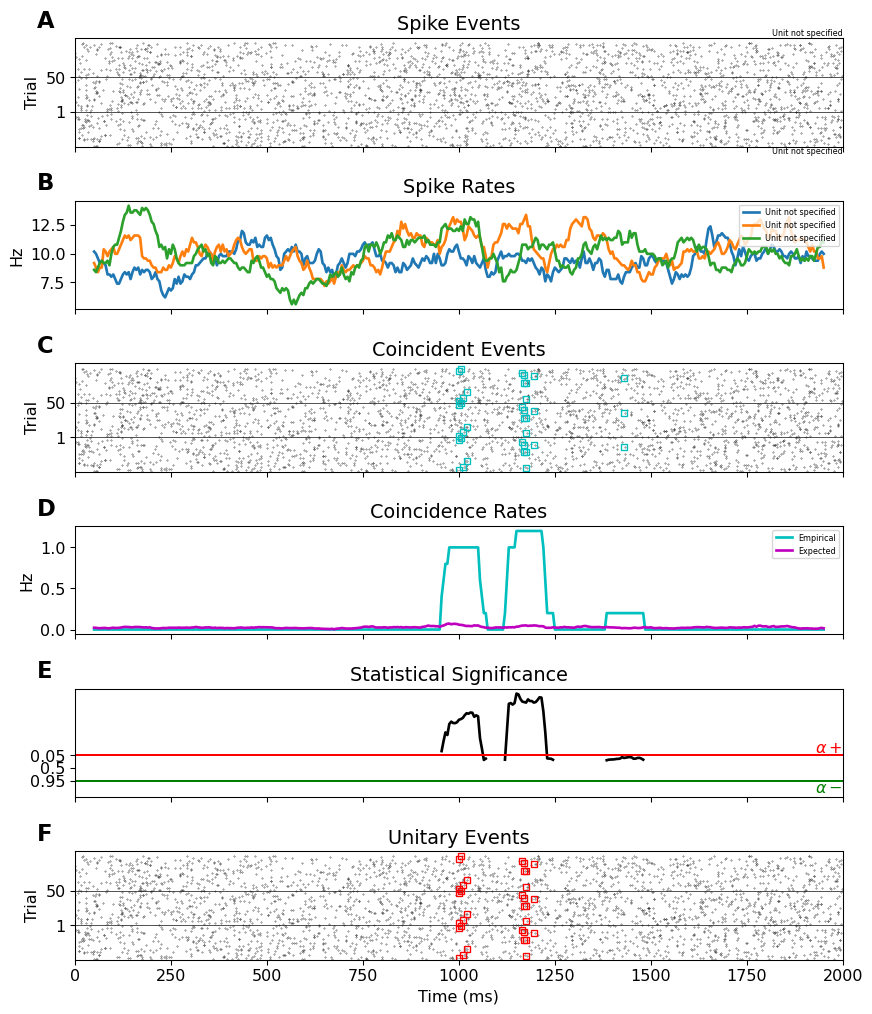

## 4 Scaling Unitary Event Analysis to Large Data Sets

| Code | Description |
|------------------------------------|------------------------------------|
| `ph = ue.hash_from_pattern([0, 1, 1])` | Create a hash that represents a pattern where neuron 1 is inactive and neurons 2 and 3 are active |
| `UE = ue.jointJ_window_analysis(trials, pattern_hash=ph)` | Use UEA to search for the patterns indicated by the `pattern_hash` |

<span class="theorem-title">**Exercise 6**</span> The code below
simulates **2 neurons** for **100 trials** with a base firing rate of
**10 Hz** and a synchronous firing rate of **1 Hz** and adds a third
neuron that is purely random. Run unitary event analysis on the
simulated `trials` with a `bin_size` of **1 ms** and plot the results.
Did you find any unitary events?

``` python
trials, _ = utils.spike_trains_with_unitary_events(
    base_rate=10 * pq.Hz, sync_rate=1 * pq.Hz, n_neurons=2, n_trials=100
)
neuron = StationaryPoissonProcess(rate=10 * pq.Hz, t_stop=2 * pq.s)
for t in range(len(trials)):
    trials[t].append(neuron.generate_spiketrain())
```

``` python
UE = ue.jointJ_window_analysis(trials, bin_size=1*pq.ms)
plot_ue(trials, UE, significance_level=0.05)
```

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

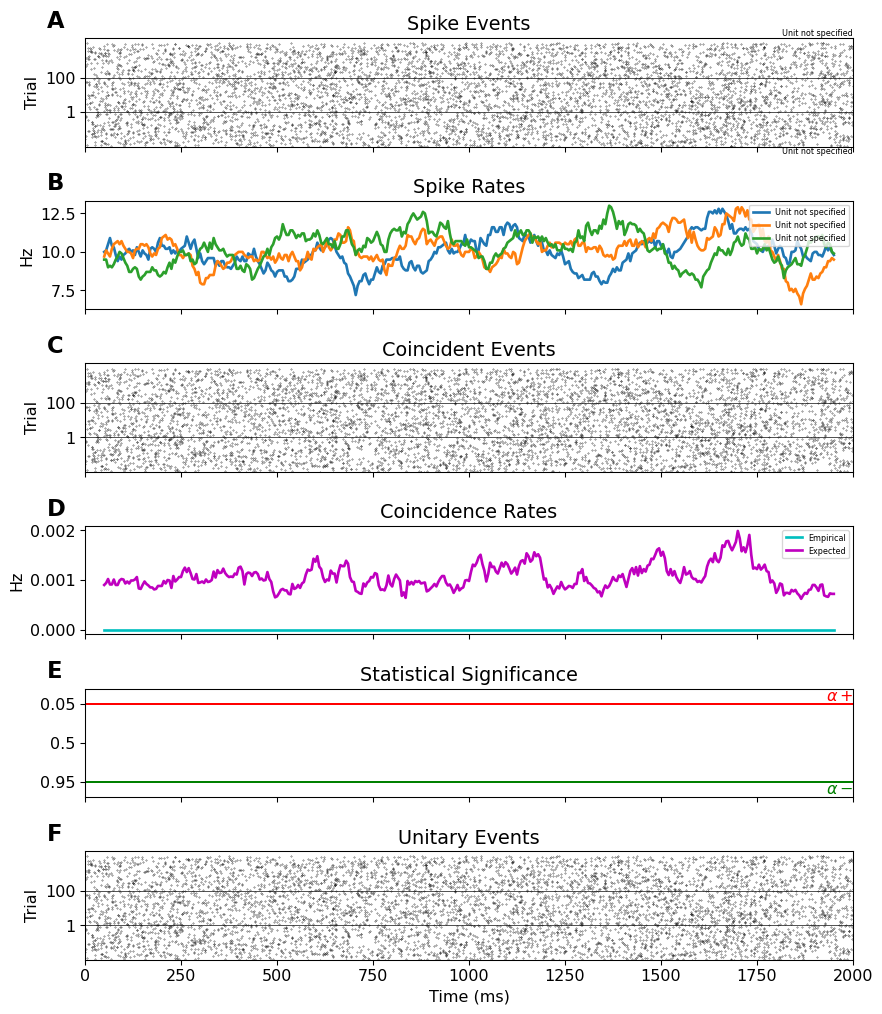

<span class="theorem-title">**Example 3**</span> Use a `pattern_hash` to
only search for patterns in the `trials` where units 1 and 2 are active
and unit 3 is not (i.e. the pattern `[1,1,0]`).

``` python
pattern_hash = ue.hash_from_pattern([1, 1, 0])
UE = ue.jointJ_window_analysis(trials, pattern_hash=pattern_hash)
plot_ue(trials, UE, significance_level=0.01)
```

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

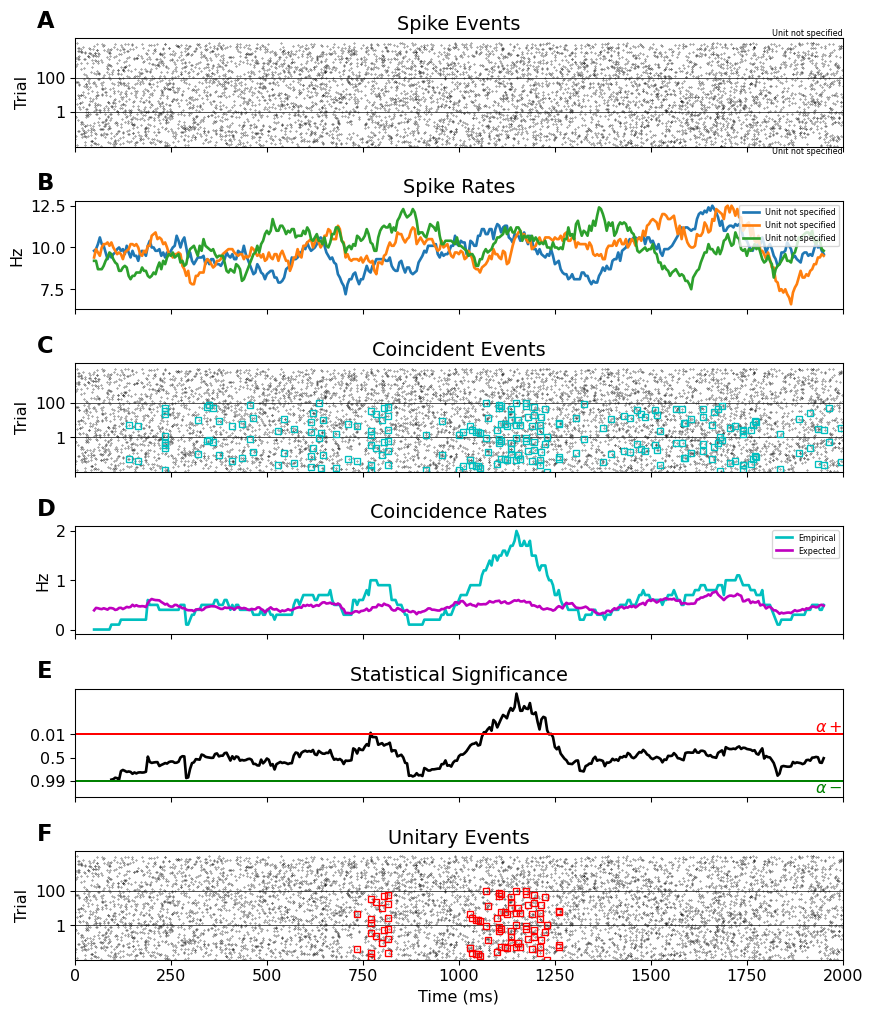

<span class="theorem-title">**Exercise 7**</span> The code below
simulates **3 neurons** for **50 trials** with a base firing rate of
**10 Hz** and a synchronous firing rate of **1 Hz** and inserts two
neuron that are purely random at positions 2 and 4. Use unitary event
analysis with a `pattern_hash` that only searchers for synchronous
activity in neurons 1, 3 and 5 and **ignores neurons 2 and 4**

``` python
trials, _ = utils.spike_trains_with_unitary_events(
    base_rate=10 * pq.Hz, sync_rate=1 * pq.Hz, n_neurons=3, n_trials=50
)
neuron = StationaryPoissonProcess(rate=10 * pq.Hz, t_stop=2 * pq.s)
for t in range(len(trials)):
    trials[t].insert(1, neuron.generate_spiketrain())
for t in range(len(trials)):
    trials[t].insert(3, neuron.generate_spiketrain())
```

``` python
pattern_hash = ue.hash_from_pattern([1, 0, 1, 0, 1])
UE = ue.jointJ_window_analysis(trials, pattern_hash=pattern_hash)
plot_ue(trials, UE, significance_level=0.01)
```

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

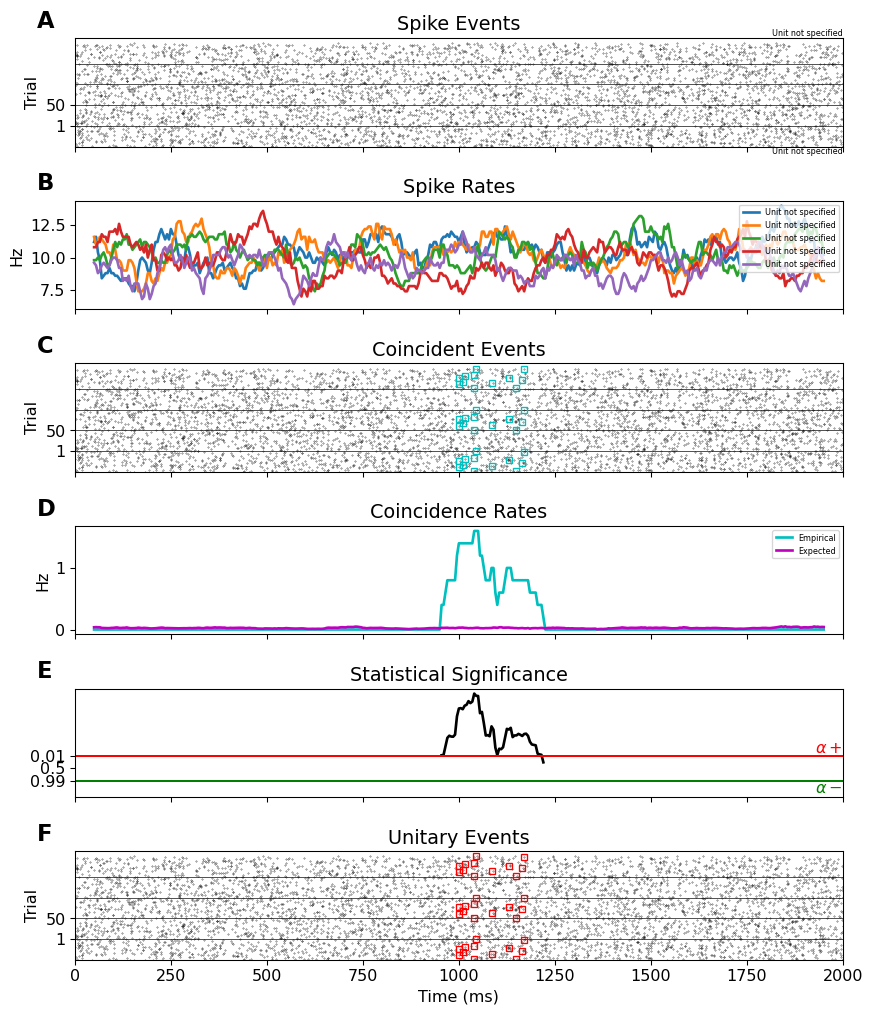

<span class="theorem-title">**Exercise 8**</span> (Bonus): Assuming that
we don’t know which exact pattern to look for, we can use UEA to search
for all patterns that involve 3 out of the 5 neurons. Apply unitary
event analaysis using the list of `pattern_hashes` generated below.

``` python
patterns = [
    [1, 1, 1, 0, 0],  # neurons 1,2,3 fire
    [1, 1, 0, 1, 0],  # neurons 1,2,4 fire
    [1, 1, 0, 0, 1],  # neurons 1,2,5 fire
    [1, 0, 1, 1, 0],  # neurons 1,3,4 fire
    [1, 0, 1, 0, 1],  # neurons 1,3,5 fire
    [1, 0, 0, 1, 1],  # neurons 1,4,5 fire
    [0, 1, 1, 1, 0],  # neurons 2,3,4 fire
    [0, 1, 1, 0, 1],  # neurons 2,3,5 fire
    [0, 1, 0, 1, 1],  # neurons 2,4,5 fire
    [0, 0, 1, 1, 1],  # neurons 3,4,5 fire
]
pattern_hashes = [ue.hash_from_pattern(p) for p in patterns]
```

``` python
UE = ue.jointJ_window_analysis(trials, pattern_hash=pattern_hashes)
```

Is there a way to plot only one specific pattern hash?

FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

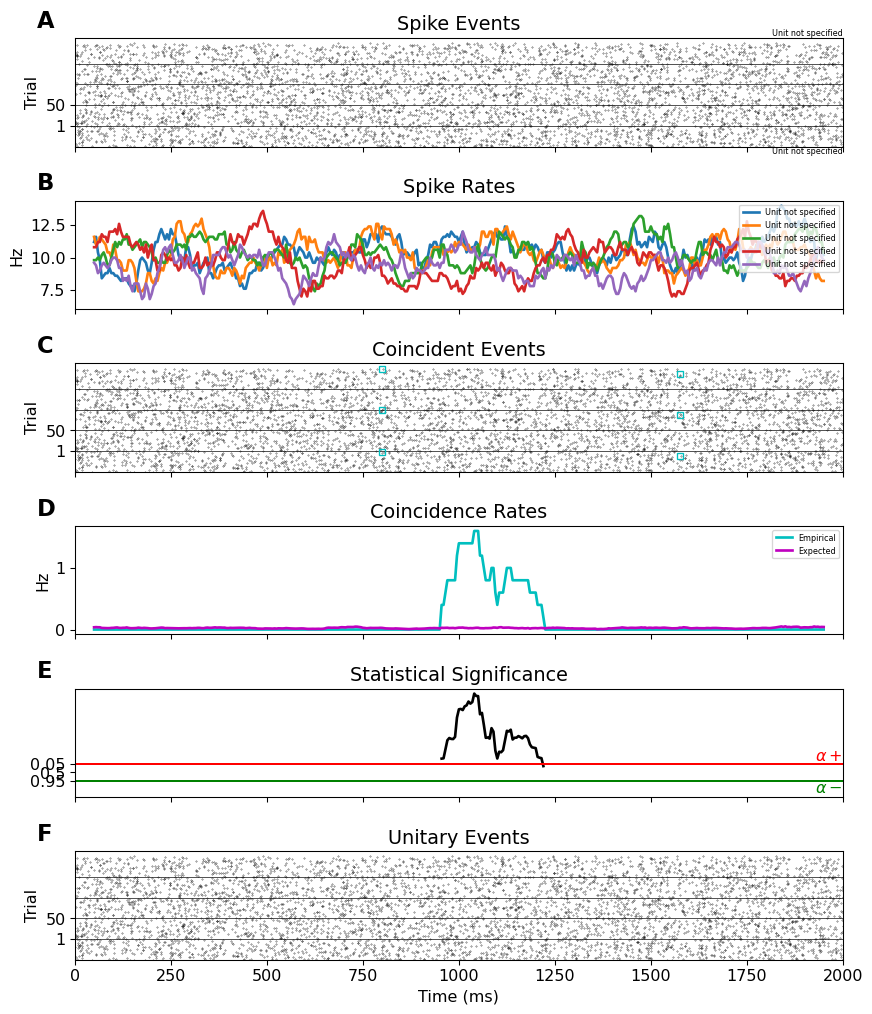

In [19]:
idx = 4
x = UE.copy()
x["input_parameters"]["pattern_hash"] = [x["input_parameters"]["pattern_hash"][idx]]
x["Js"] = x["Js"][:, idx]
x["n_emp"] = x["n_emp"][:, idx]
x["n_exp"] = x["n_exp"][:, idx]
x["rate_avg"] = x["rate_avg"][:, idx]
plot_ue(trials, x, significance_level=0.05)

## 5 Applying Unitary Event Analysis to Real Data

| Code | Description |
|------------------------------------|------------------------------------|
| `trials = utils.load_spike_trains(unit_ids[1,2])` | Load spike trains from units 1 and 2 and return a list of `trials` where each element is a list containing the spike trains for each unit |

------------------------------------------------------------------------

<span class="theorem-title">**Example 4**</span> Load the spike trains
for units 1 and 2, perform unitary event analysis and plot the results,
highlighting the spikes that exceed the significance level of **0.01**.

``` python
trials = utils.load_spike_trains(unit_ids=[1, 2])
UE = ue.jointJ_window_analysis(trials)
plot_ue(trials, UE, significance_level=0.01)
```

    387

    FigureUE(axes_spike_events=<Axes: title={'center': 'Spike Events'}, ylabel='Trial'>, axes_spike_rates=<Axes: title={'center': 'Spike Rates'}, ylabel='Hz'>, axes_coincident_events=<Axes: title={'center': 'Coincident Events'}, ylabel='Trial'>, axes_coincidence_rates=<Axes: title={'center': 'Coincidence Rates'}, ylabel='Hz'>, axes_significance=<Axes: title={'center': 'Statistical Significance'}>, axes_unitary_events=<Axes: title={'center': 'Unitary Events'}, xlabel='Time (ms)', ylabel='Trial'>)

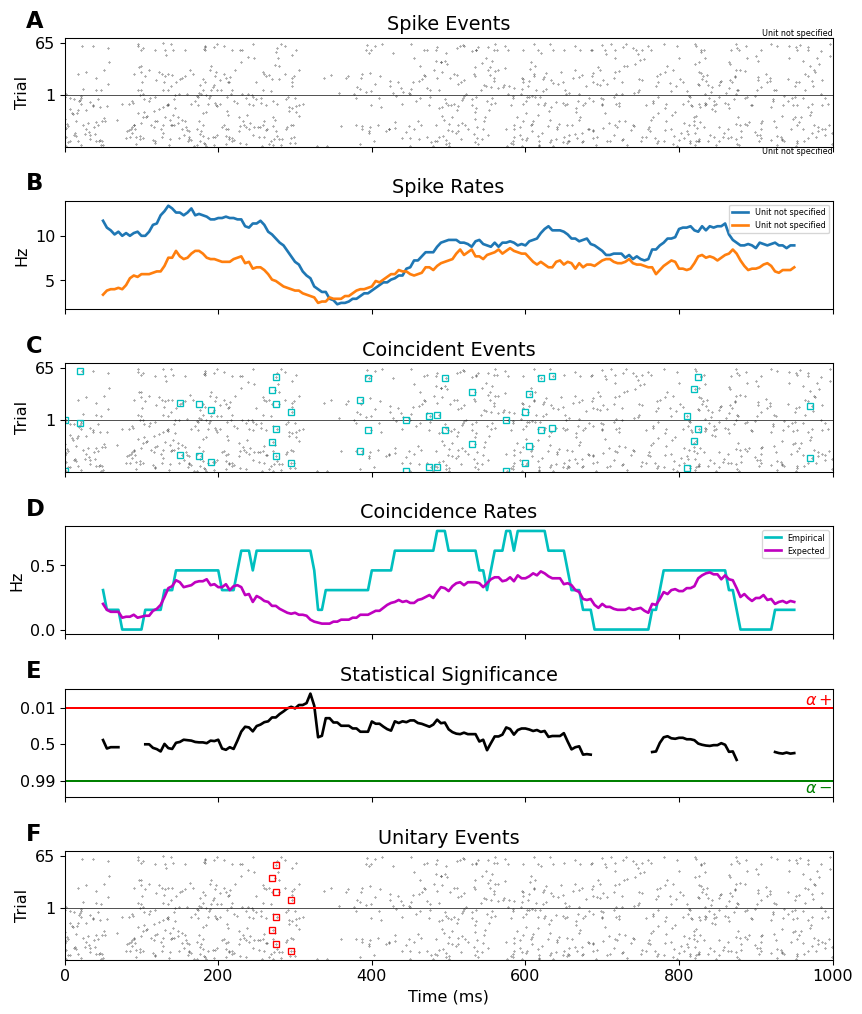